# ESG Portfolio Analysis Visualizations
This notebook contains visualizations analyzing the relationship between ESG scores and stock performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from plotly.subplots import make_subplots

# Set style

pd.set_option('display.max_columns', None)

In [2]:
# Read the data
df = pd.read_csv('merged_data.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (176, 31)


,Ticker,YTD_Change,YTD_Return,1M_Change,1M_Return,3M_Change,3M_Return,6M_Change,6M_Return,12M_Change,12M_Return,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,Market Cap,EBITDA,GIS Sector,Sub Industry,environmentScore,socialScore,governanceScore,totalEsg,highestControversy,percentile,ratingYear,ratingMonth,beta,overallRisk
0,CSCO,-23.060479,0.769395,8.495200,1.084952,10.167764,1.101678,10.947493,1.109475,-17.983120,0.820169,Cisco Systems,Information Technology,38.77,17.87,2.875558,1.91,1.994257e+11,1.544700e+10,Information Technology,Communications Equipment,0.45,6.90,6.51,13.87,2.0,8.46,2023.0,9.0,0.819,1
1,ISRG,-24.494442,0.755056,2.542637,1.025426,28.580896,1.285809,38.591751,1.385918,-21.202454,0.787975,Intuitive Surgical Inc.,Health Care,381.87,48.58,0.000000,5.67,4.486662e+10,1.153700e+09,Health Care,Health Care Equipment,3.65,9.58,7.84,21.07,1.0,32.14,2023.0,9.0,1.395,3
2,GILD,21.052629,1.210526,7.382059,1.073821,34.961602,1.349616,50.470974,1.504710,25.067617,1.250676,Gilead Sciences,Health Care,78.22,8.16,2.754954,9.95,1.081068e+11,1.759000e+10,Health Care,Biotechnology,1.00,14.34,7.62,22.97,2.0,39.94,2023.0,9.0,0.196,2
3,V,-3.639976,0.963600,4.082924,1.040829,6.861320,1.068613,8.773446,1.087734,-0.014058,0.999859,Visa Inc.,Information Technology,113.86,32.72,0.702048,2.80,2.700387e+11,1.308600e+10,Financials,Transaction & Payment Processing Services,1.81,8.22,6.65,16.68,3.0,16.22,2023.0,9.0,0.963,3
4,A,-0.690185,0.993098,4.780525,1.047805,16.369628,1.163696,33.424910,1.334249,-0.550365,0.994496,Agilent Technologies Inc,Health Care,65.05,27.45,0.875698,2.10,2.198461e+10,1.094000e+09,Health Care,Life Sciences Tools & Services,1.12,6.42,6.10,13.64,2.0,7.98,2023.0,9.0,1.054,8


## 1. Portfolio Group Creation and Analysis

In [3]:
# Create ESG portfolio groups
n_groups = 3
df['ESG_Group'] = pd.qcut(df['totalEsg'], q=n_groups, labels=['Low ESG', 'Medium ESG', 'High ESG'])

# Calculate group statistics
group_stats = df.groupby('ESG_Group').agg({
    'totalEsg': ['mean', 'std', 'count'],
    '1M_Return': ['mean', 'std'],
    '3M_Return': ['mean', 'std'],
    '6M_Return': ['mean', 'std'],
    '12M_Return': ['mean', 'std']
}).round(4)

group_stats

/var/folders/wr/t_bxfzcj2833m59mtbb50m_w0000gn/T/ipykernel_75723/2926741080.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = df.groupby('ESG_Group').agg({


totalEsg               1M_Return         3M_Return          \
               mean     std count      mean     std      mean     std   
ESG_Group                                                               
Low ESG     14.1586  2.2451    59    0.9907  0.0581    1.0383  0.1284   
Medium ESG  20.7131  1.6941    58    1.0055  0.0541    1.0618  0.1310   
High ESG    28.1032  3.8814    59    0.9909  0.0747    1.0376  0.1127   

           6M_Return         12M_Return          
                mean     std       mean     std  
ESG_Group                                        
Low ESG       1.0900  0.1747     0.8611  0.1745  
Medium ESG    1.1274  0.1673     0.9433  0.2009  
High ESG      1.0810  0.1421     1.0025  0.3106

## 2. Portfolio Performance Comparison

In [4]:
# Create subplots
fig = make_subplots(rows=2, cols=2, 
                   subplot_titles=('1-Month Returns', '3-Month Returns', 
                                 '6-Month Returns', '12-Month Returns'))

# Add box plots for each time period
time_periods = ['1M_Return', '3M_Return', '6M_Return', '12M_Return']
positions = [(1,1), (1,2), (2,1), (2,2)]

for period, pos in zip(time_periods, positions):
    fig.add_trace(
        go.Box(
            y=df[period],
            x=df['ESG_Group'],
            name=period,
            boxpoints='all',
            jitter=0.3,
            pointpos=-1.8
        ),
        row=pos[0], col=pos[1]
    )

fig.update_layout(
    height=800,
    width=1000,
    title_text='Return Distributions by ESG Group',
    showlegend=False
)
fig.show()

## 3. Risk-Adjusted Returns Analysis

/var/folders/wr/t_bxfzcj2833m59mtbb50m_w0000gn/T/ipykernel_75723/3005397136.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 1200x600 with 0 Axes>

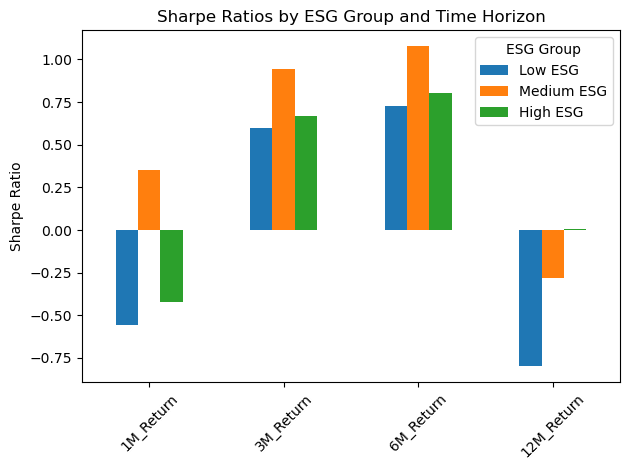

In [5]:
# Calculate Sharpe ratios (assuming risk-free rate of 0 for simplicity)
def calculate_sharpe(returns, periods=12):
    return np.sqrt(periods) * ((returns - 1).mean() / (returns - 1).std())

sharpe_ratios = df.groupby('ESG_Group').agg({
    '1M_Return': lambda x: calculate_sharpe(x, 12),
    '3M_Return': lambda x: calculate_sharpe(x, 4),
    '6M_Return': lambda x: calculate_sharpe(x, 2),
    '12M_Return': lambda x: calculate_sharpe(x, 1)
})

# Plot Sharpe ratios
plt.figure(figsize=(12, 6))
sharpe_ratios.T.plot(kind='bar')
plt.title('Sharpe Ratios by ESG Group and Time Horizon')
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=45)
plt.legend(title='ESG Group')
plt.tight_layout()
plt.show()

## 4. Sector Composition Analysis

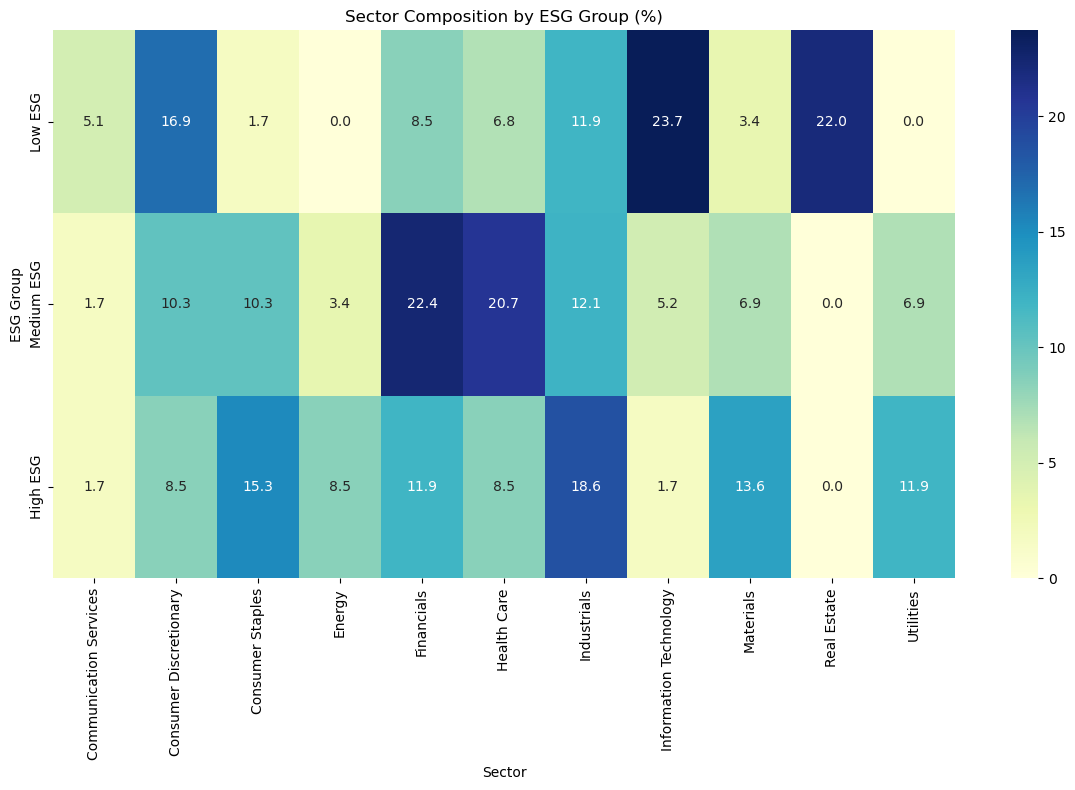

In [6]:
# Calculate sector composition
sector_composition = pd.crosstab(df['ESG_Group'], df['GIS Sector'], normalize='index') * 100

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sector_composition, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Sector Composition by ESG Group (%)')
plt.xlabel('Sector')
plt.ylabel('ESG Group')
plt.tight_layout()
plt.show()

## 5. ESG Score Distribution and Performance

In [7]:
# Create scatter plot with regression lines
fig = px.scatter(df, x='totalEsg', y='12M_Return', 
                color='ESG_Group',
                trendline='ols',
                title='ESG Score vs 12-Month Returns',
                labels={'totalEsg': 'ESG Score', '12M_Return': '12-Month Return'})

fig.update_layout(
    height=600,
    width=800,
    showlegend=True
)
fig.show()

## 6. Performance During Market Conditions

/var/folders/wr/t_bxfzcj2833m59mtbb50m_w0000gn/T/ipykernel_75723/1699558819.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



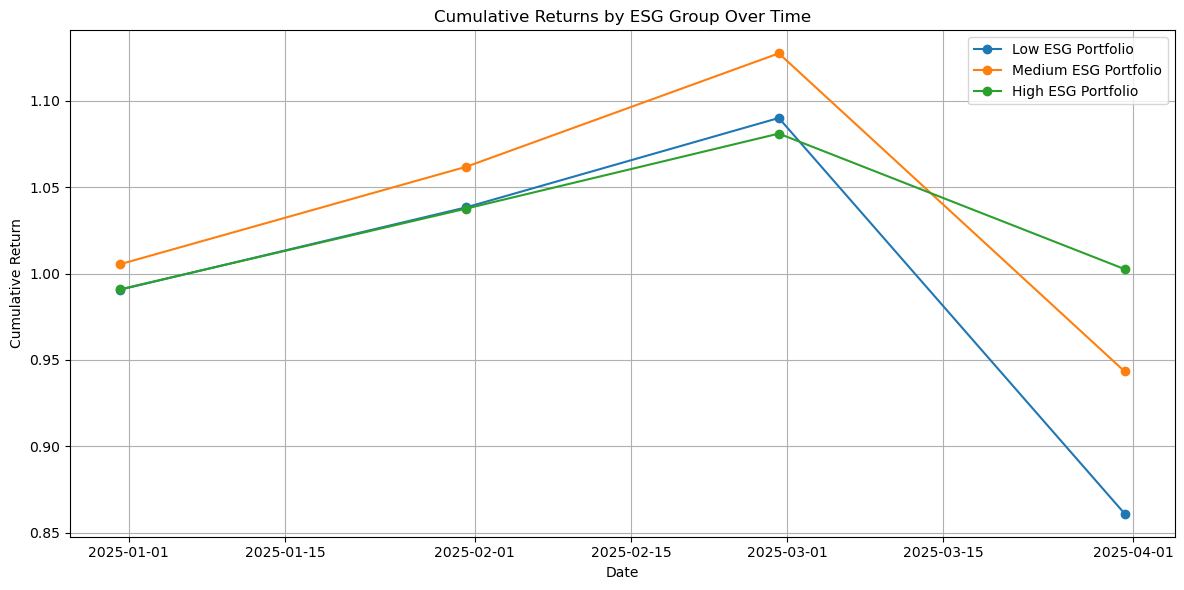

In [8]:
# Calculate cumulative returns for each group
time_periods = ['1M_Return', '3M_Return', '6M_Return', '12M_Return']
dates = pd.date_range(end=pd.Timestamp.now(), periods=len(time_periods), freq='M')

plt.figure(figsize=(12, 6))
for group in df['ESG_Group'].unique():
    group_data = df[df['ESG_Group'] == group]
    cumulative_returns = [group_data[period].mean() for period in time_periods]
    plt.plot(dates, cumulative_returns, label=f'{group} Portfolio', marker='o')

plt.title('Cumulative Returns by ESG Group Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 7. Statistical Significance Tests

In [9]:
# Perform ANOVA test for each time period
results = {}
for period in ['1M_Return', '3M_Return', '6M_Return', '12M_Return']:
    groups = [df[df['ESG_Group'] == group][period] for group in df['ESG_Group'].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    results[period] = {'F-statistic': f_stat, 'p-value': p_value}

# Display results
pd.DataFrame(results).T.round(4)

,F-statistic,p-value
1M_Return,1.0509,0.3518
3M_Return,0.7160,0.4902
6M_Return,1.3472,0.2627
12M_Return,5.3302,0.0057
